In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CO2 emissions data
co2_df = pd.read_csv('CO2.csv', skiprows=4)
co2_df = co2_df.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 67'], axis = 1)
co2_df = co2_df.dropna(axis=1, how='all')
co2_df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,304614.720181,300135.943094,296834.691723,305267.779142,314596.287085,329784.557767,342368.178325,358278.381587,...,525337.889289,546775.865,568547.519,591680.972,576265.992,580219.242,590905.482,598720.9575,610723.50,544952.503
2,Afghanistan,AFG,2046.870000,1941.370000,1525.470000,1527.890000,1493.590000,1457.690000,1407.300000,1344.100000,...,11961.890000,10208.130,9402.050,9281.340,10057.590,9294.930,10022.780,10972.3800,11238.83,8709.470
3,Africa Western and Central,AFW,97190.345000,110559.933800,121628.003000,114995.869000,106198.491000,116198.614000,134252.745000,134320.486000,...,165498.494900,170350.670,186486.660,196343.630,194363.640,201399.220,200550.900,210618.8900,222990.35,215915.610
4,Angola,AGO,6564.200000,6674.500000,6877.300000,9269.700000,11298.230000,12719.480000,15442.400000,16154.900000,...,23865.800000,23868.000,26958.700,29610.500,31648.900,29520.700,25064.800,23637.4000,24382.90,19814.500


In [3]:
# Read GDP emissions data
GDP_df = pd.read_csv('GDP.csv', skiprows=4)
GDP_df = GDP_df.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 67'], axis = 1)
GDP_df = GDP_df.dropna(axis = 1, how = "all")
selected_columns = [str(year) for year in range(1990, 2021)]
GDP_df = GDP_df[['Country Name', 'Country Code'] + selected_columns]
GDP_df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,3.961402,7.962872,5.882354,7.307693,8.203901,2.547144,1.185789,7.046875,...,3.366778,-1.035375,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257855,0.635030,-18.589099
1,Africa Eastern and Southern,AFE,-0.018534,0.136909,-1.979622,-0.365019,1.984762,4.335235,5.450146,4.433279,...,3.706906,0.845016,4.219599,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101
3,Africa Western and Central,AFW,6.579375,1.110253,2.692197,-1.201763,-0.274994,1.929529,4.638415,4.255206,...,4.852866,5.137566,6.109741,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800
4,Angola,AGO,-3.450099,0.991359,-5.838281,-23.983417,1.339363,15.000000,13.544370,7.274277,...,3.472053,8.542107,4.954613,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215


In [4]:
# Melt both dataframes to convert them to long format
co2_df_long = pd.melt(co2_df, 
                      id_vars=['Country Name', 'Country Code'], 
                      var_name='Year', 
                      value_name='CO2 Emission')

gdp_df_long = pd.melt(GDP_df, id_vars=['Country Name', 'Country Code'], 
                      var_name='Year', 
                      value_name='GDP')

In [5]:
# Merge the two dataframes based on 'Country Code' and 'Year'
merged_df = pd.merge(co2_df_long, gdp_df_long, on=['Country Code', 'Year'], how = "inner")
merged_df.head()

,Country Name_x,Country Code,Year,CO2 Emission,Country Name_y,GDP
0,Aruba,ABW,1990,NaN,Aruba,3.961402
1,Africa Eastern and Southern,AFE,1990,304614.720181,Africa Eastern and Southern,-0.018534
2,Afghanistan,AFG,1990,2046.870000,Afghanistan,NaN
3,Africa Western and Central,AFW,1990,97190.345000,Africa Western and Central,6.579375
4,Angola,AGO,1990,6564.200000,Angola,-3.450099


In [6]:
merged_df = merged_df.drop(['Country Name_y'], axis = 1)
merged_df = merged_df.dropna()
merged_df.isna().sum()

Country Name_x    0
Country Code      0
Year              0
CO2 Emission      0
GDP               0
dtype: int64

In [7]:
merged_df.head()

,Country Name_x,Country Code,Year,CO2 Emission,GDP
1,Africa Eastern and Southern,AFE,1990,304614.720181,-0.018534
3,Africa Western and Central,AFW,1990,97190.345000,6.579375
4,Angola,AGO,1990,6564.200000,-3.450099
5,Albania,ALB,1990,6060.500000,-9.575640
6,Andorra,AND,1990,406.704000,3.781388


In [8]:
# Select a few countries for analysis (replace with your desired country codes)
selected_countries = ['USA', 'CHN', 'IND', 'BRA']

# Filter the dataframe for selected countries
selected_df = merged_df[merged_df['Country Code'].isin(selected_countries)]

# Explore statistical properties using describe() method
summary_stats = selected_df[['GDP', 'CO2 Emission']].describe()

# Other statistical methods
# Example: correlation between GDP and CO2 Emission
correlation = selected_df[['GDP', 'CO2 Emission']].corr()

# Mean of GDP and CO2 Emission for each country
mean_by_country = selected_df.groupby('Country Code')[['GDP', 'CO2 Emission']].mean()

# Mean of GDP and CO2 Emission for each year
mean_by_year = selected_df.groupby('Year')[['GDP', 'CO2 Emission']].mean()

# Display the results
print("Summary Statistics:")
print(summary_stats)

print("\nCorrelation:")
print(correlation)

print("\nMean by Country:")
print(mean_by_country)

print("\nMean by Year:")
print(mean_by_year)

Summary Statistics:
              GDP  CO2 Emission
count  124.000000  1.240000e+02
mean     4.817566  3.283375e+06
std      3.914132  2.970650e+06
min     -5.831053  1.978974e+05
25%      2.241101  5.505861e+05
50%      4.417562  2.363490e+06
75%      7.687776  5.160716e+06
max     14.230861  1.094469e+07

Correlation:
                   GDP  CO2 Emission
GDP           1.000000      0.220337
CO2 Emission  0.220337      1.000000

Mean by Country:
                   GDP  CO2 Emission
Country Code                        
BRA           2.020812  3.451139e+05
CHN           9.112080  6.185670e+06
IND           5.840839  1.356317e+06
USA           2.296532  5.246397e+06

Mean by Year:
           GDP  CO2 Emission
Year                        
1990  1.747418   1944838.600
1991  2.810886   1980595.275
1992  5.671324   2032990.025
1993  6.577744   2126807.950
1994  7.394349   2185717.475
1995  6.359114   2296199.325
1996  5.863377   2345118.925
1997  5.282155   2444516.450
1998  4.712465   24884

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_11856/2405075412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Year'] = pd.to_datetime(selected_df['Year'], format='%Y')


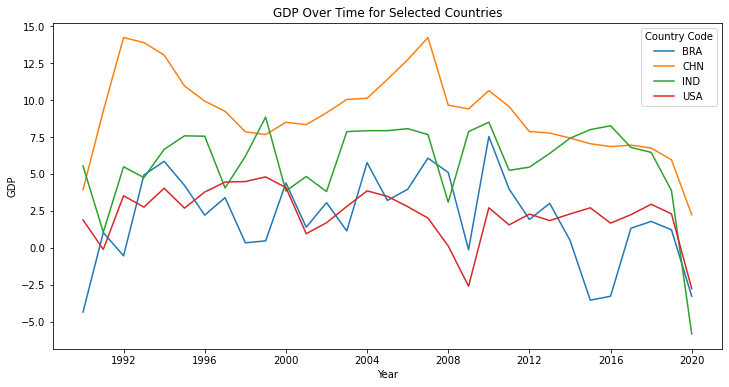

In [9]:
# Convert 'Year' column to datetime for proper time series plotting
selected_df['Year'] = pd.to_datetime(selected_df['Year'], format='%Y')

# Line plot for GDP over time for each country
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP', hue='Country Code', data=selected_df)
plt.title('GDP Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

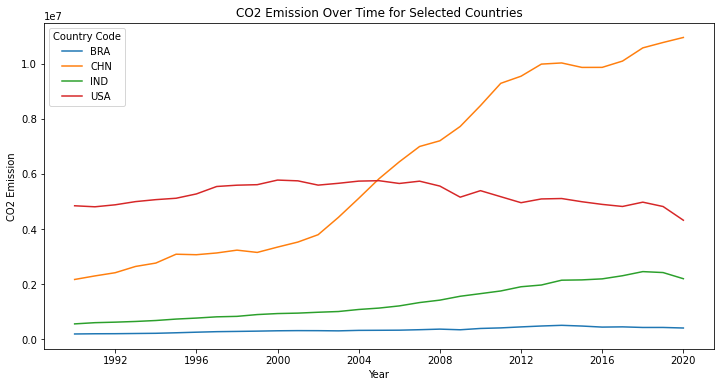

In [10]:
# Line plot for CO2 Emission over time for each country
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2 Emission', hue='Country Code', data=selected_df)
plt.title('CO2 Emission Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.show()

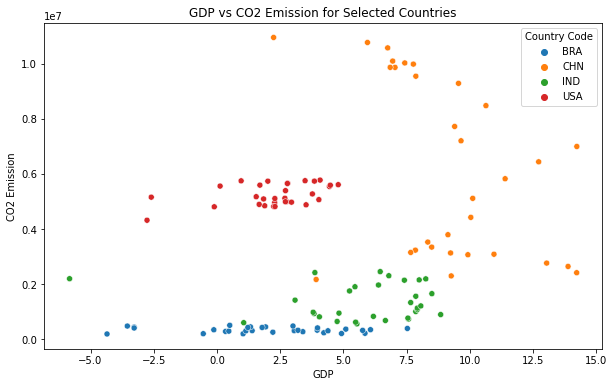

In [11]:
# Scatter plot to compare GDP and CO2 Emission for each country
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='CO2 Emission', hue='Country Code', data=selected_df)
plt.title('GDP vs CO2 Emission for Selected Countries')
plt.xlabel('GDP')
plt.ylabel('CO2 Emission')
plt.show()

In [12]:
# Create a correlation matrix grouped by country
correlation_matrix_grouped = selected_df.groupby('Country Code')[['GDP', 'CO2 Emission']].corr()
correlation_matrix_grouped

GDP  CO2 Emission
Country Code                                     
BRA          GDP           1.000000     -0.143596
             CO2 Emission -0.143596      1.000000
CHN          GDP           1.000000     -0.436600
             CO2 Emission -0.436600      1.000000
IND          GDP           1.000000     -0.052925
             CO2 Emission -0.052925      1.000000
USA          GDP           1.000000      0.437015
             CO2 Emission  0.437015      1.000000